In [1]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import date
import datetime
from pathlib import Path
import seaborn as sns

In [2]:
if not os.path.exists(f'Z:\Graficos Boletim_Python/Gráficos {date.today().day}_{date.today().month}_{date.today().year}'):
    os.makedirs(f'Z:\Graficos Boletim_Python/Gráficos {date.today().day}_{date.today().month}_{date.today().year}')

In [3]:
caminho = r'C:\Users\ryan-rosa\Desktop\Ryan\Python\Codes19.09.2022\Banco_Painel'
lista_arquivos = os.listdir(caminho)
lista_datas = []

for arquivo in lista_arquivos:
    #Descobrir a data desse arquivo
    data = os.path.getmtime(f'{caminho}/{arquivo}')
    lista_datas.append((data,arquivo))

lista_datas.sort(reverse=True) #Vai ordenar a lista em ordem decrescente com reverse=True Obs: Ele ordena sempre com o primeiro valor, por isso colocamos data antes de arquivo
ultimo_arquivo = lista_datas[0][1] #Pega o ultimo arquivo
ultimo_arquivo

'20221121.csv'

In [4]:
#dados = pd.read_csv(f'{caminho}/{ultimo_arquivo}',sep=";")
dados = pd.read_csv(r'C:/Users/ryan-rosa/Desktop/Ryan/Python/Codes19.09.2022/Banco_Painel/20221121.csv',sep=';')

In [5]:
filtrado = dados[['DATA_SINTOMAS','COD_IBGE']]
filtrado['DATA_SINTOMAS'] = pd.to_datetime(filtrado['DATA_SINTOMAS'],infer_datetime_format=True,format='%d/%m/%Y')
filtrado = filtrado.groupby('DATA_SINTOMAS').count()
filtrado = filtrado.sort_values(by=['DATA_SINTOMAS'])
filtrado = filtrado.reset_index()
filtrado.tail()

C:\Users\ryan-rosa\AppData\Local\Temp\ipykernel_21308\2413552184.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtrado['DATA_SINTOMAS'] = pd.to_datetime(filtrado['DATA_SINTOMAS'],infer_datetime_format=True,format='%d/%m/%Y')


,DATA_SINTOMAS,COD_IBGE
994,2022-11-15,623
995,2022-11-16,446
996,2022-11-17,199
997,2022-11-18,79
998,2022-11-19,16


In [6]:
media_movel = filtrado.set_index('DATA_SINTOMAS')
media_movel = media_movel.rolling(7).mean()
media_movel = media_movel.reset_index()
media_movel.head(20)

,DATA_SINTOMAS,COD_IBGE
0,2020-02-25,NaN
1,2020-02-26,NaN
2,2020-02-27,NaN
3,2020-02-28,NaN
4,2020-02-29,NaN
5,2020-03-01,NaN
6,2020-03-02,12.285714
7,2020-03-03,12.571429
8,2020-03-04,12.714286
9,2020-03-05,14.571429


In [7]:
semana = filtrado.iloc[6:]
semana = semana['DATA_SINTOMAS']
semana = semana.map(lambda x: str(x)[2:10])
semana

6      20-03-02
7      20-03-03
8      20-03-04
9      20-03-05
10     20-03-06
         ...   
994    22-11-15
995    22-11-16
996    22-11-17
997    22-11-18
998    22-11-19
Name: DATA_SINTOMAS, Length: 993, dtype: object

In [8]:
casos_sintomas = media_movel.iloc[6:]
casos_sintomas = casos_sintomas['COD_IBGE']
casos_sintomas

6       12.285714
7       12.571429
8       12.714286
9       14.571429
10      15.142857
          ...    
994    474.857143
995    502.571429
996    484.142857
997    443.714286
998    381.571429
Name: COD_IBGE, Length: 993, dtype: float64

In [9]:
pasta = r'Z:\Graficos Boletim_Python'
lista_arquivos = os.listdir(pasta)
lista_datas = []

for arquivo in lista_arquivos:
    #Descobrir a data desse arquivo
    data = os.path.getmtime(f'{pasta}/{arquivo}')
    lista_datas.append((data,arquivo))

lista_datas.sort(reverse=True) #Vai ordenar a lista em ordem decrescente com reverse=True Obs: Ele ordena sempre com o primeiro valor, por isso colocamos data antes de arquivo
ultima_pasta = lista_datas[0][1] #Pega o ultimo arquivo
ultima_pasta

'Gráficos 21_11_2022'

In [10]:
np.size(semana)

993

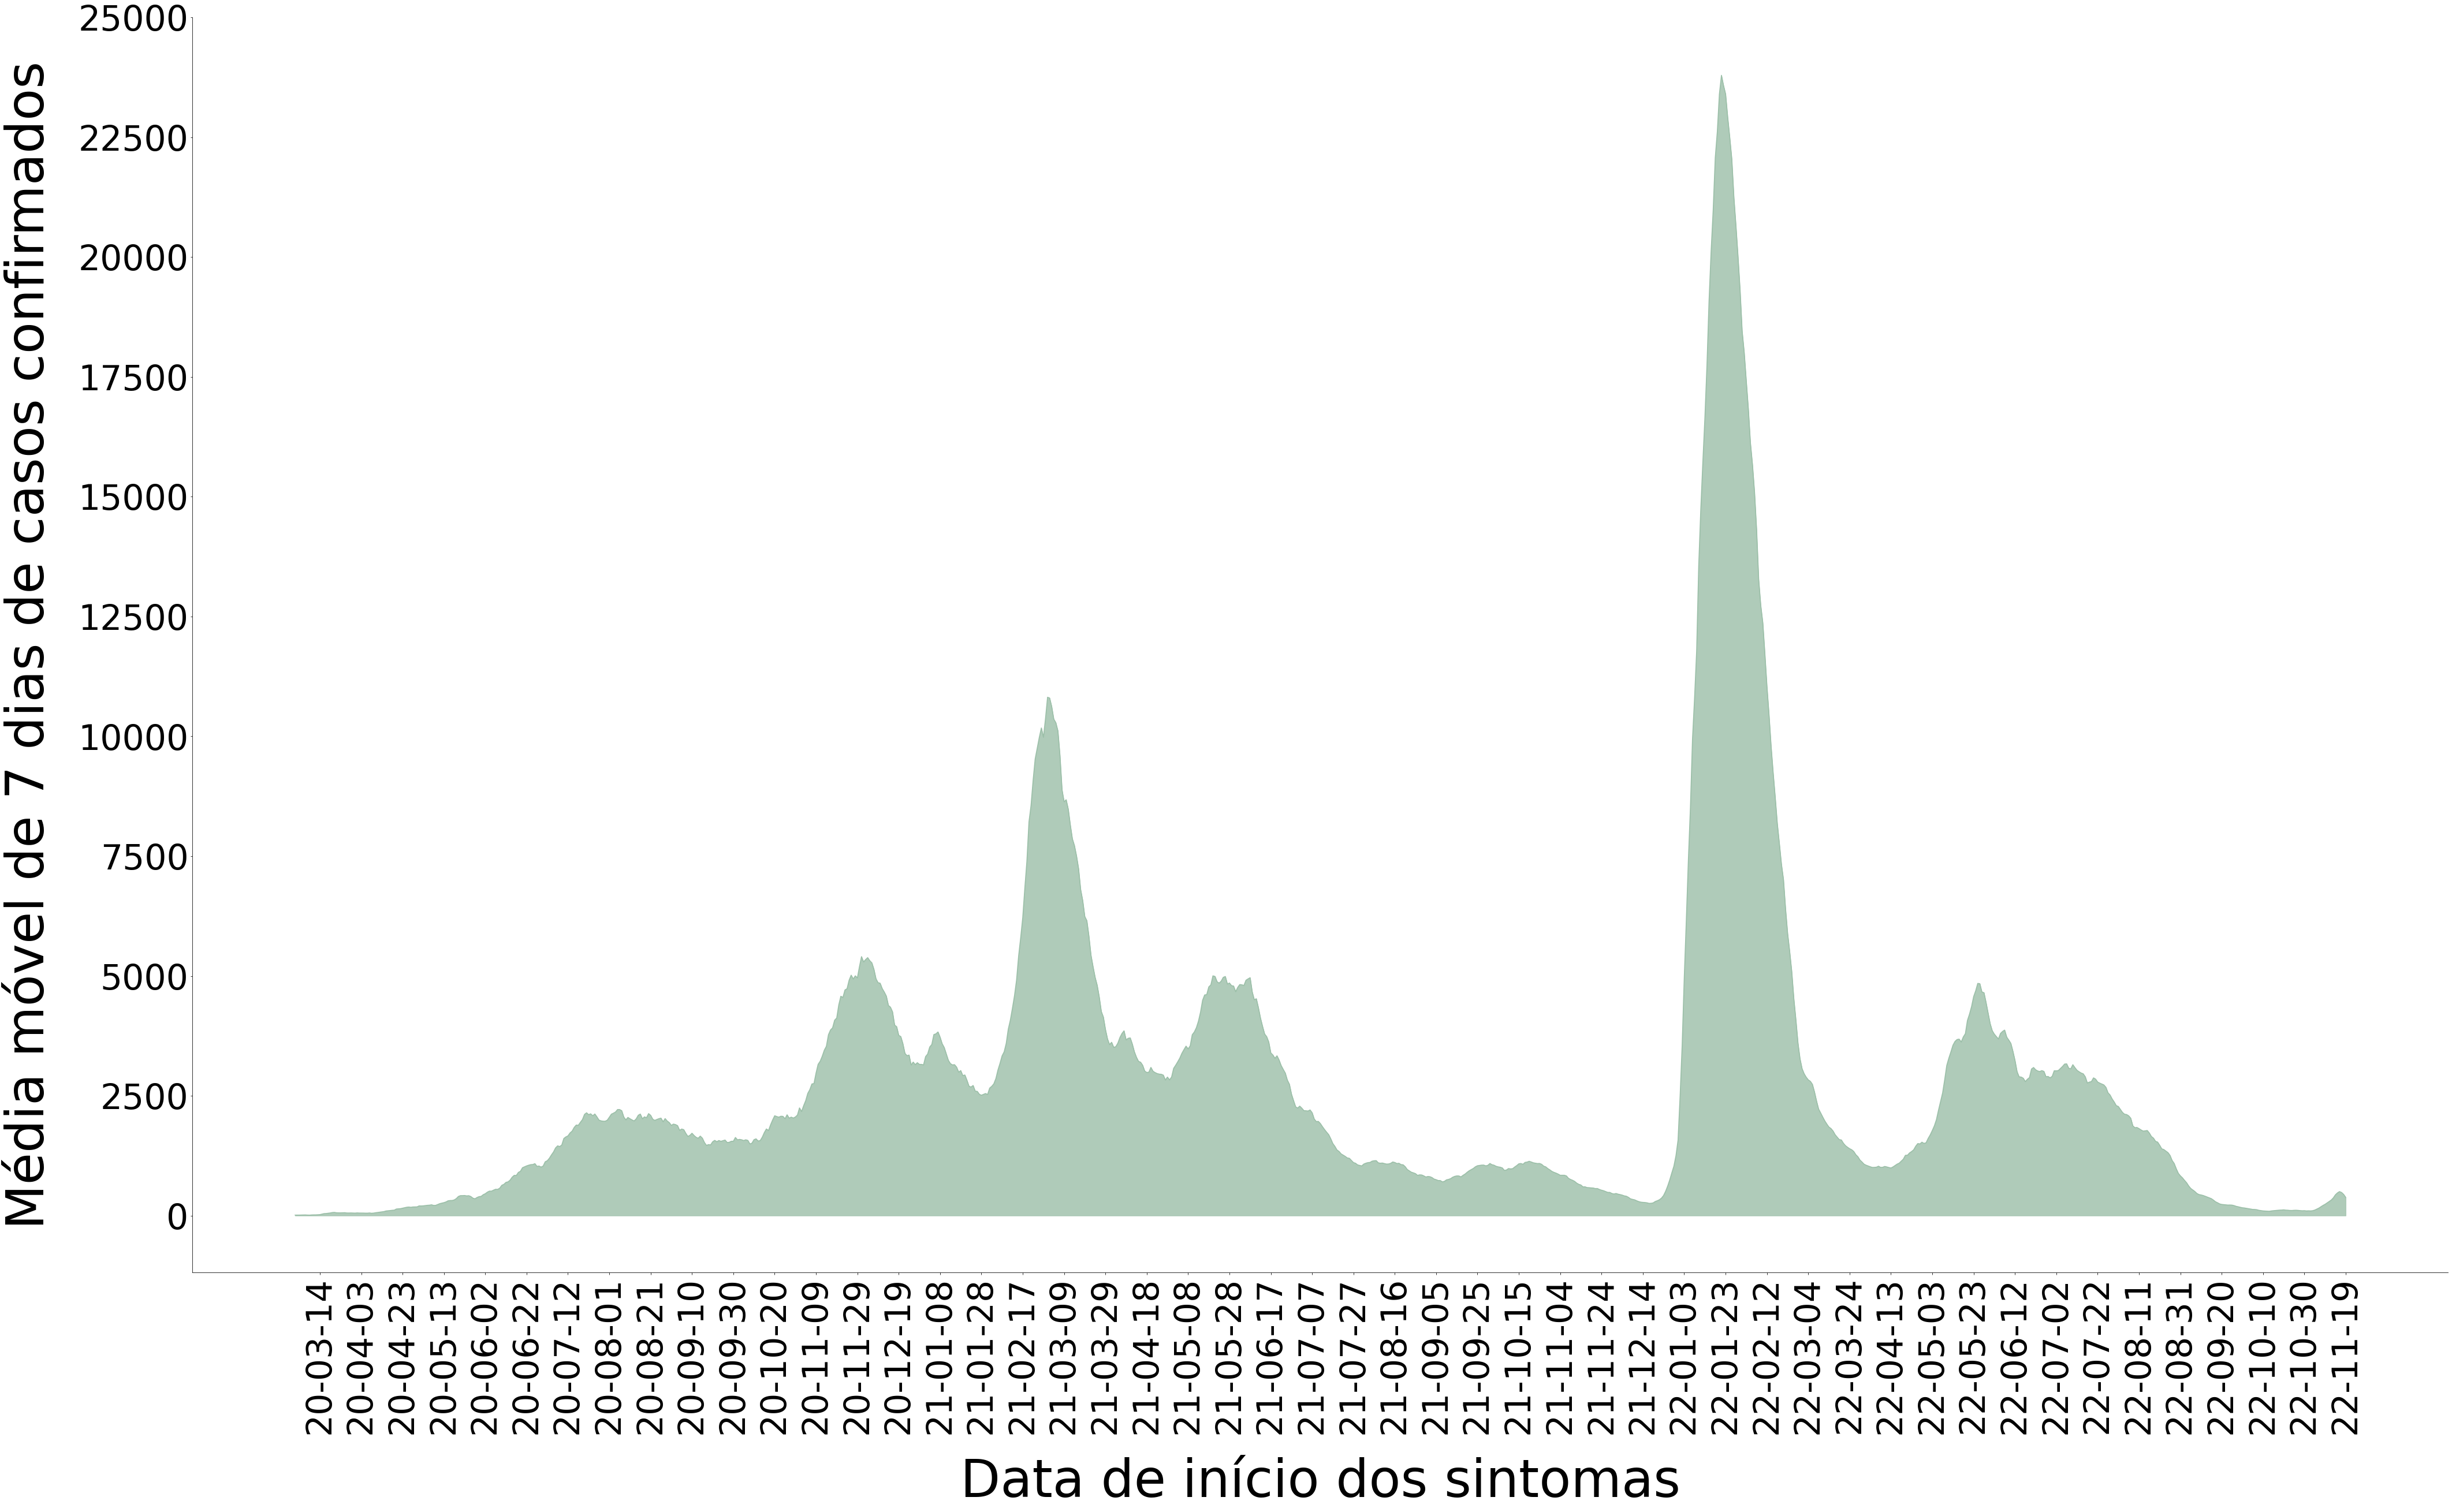

In [19]:
plt.figure(figsize=(70,40))
plt.plot(semana,casos_sintomas,color='#9bbfa8')
plt.fill_between(semana,casos_sintomas,alpha=0.8,where=(casos_sintomas>=0),color='#9bbfa8')
sns.despine()
plt.xlabel("Data de início dos sintomas",labelpad=40,fontsize=90)
plt.ylabel('Média móvel de 7 dias de casos confirmados',labelpad=40,fontsize=90)
plt.xticks(np.arange(12,np.size(semana),20),fontsize=60,rotation=90)
plt.yticks(np.arange(0,27500,2500),fontsize=60)
plt.savefig(f'Z:/Graficos Boletim_Python/{ultima_pasta}/mediaMovel_Covid.png',dpi=300,bbox_inches='tight')

# CRIANCAS GRAFICO

In [12]:
'''filtrado = dados[['FAIXAETARIA','DATA_SINTOMAS','COD_IBGE']]
filtrado['FAIXAETARIA'] = filtrado['FAIXAETARIA'].map({'<1':'Até 9 anos','01 a 04':'Até 9 anos','05 a 09':'Até 9 anos','10 a 14':'10 a 14','15 a 19':'15 a 19',
'20 a 29':'20 a 29','30 a 39':'30 a 39','40 a 49':'40 a 49','50 a 59':'50 a 59','60 a 69':'60 a 69','70 a 79':'70 a 79','80 e mais':'80 e mais'})
filtrado['DATA_SINTOMAS'] = pd.to_datetime(filtrado['DATA_SINTOMAS'],infer_datetime_format=True,format='%d/%m/%Y')
filtrado['DATA_SINTOMAS'] = filtrado['DATA_SINTOMAS'].map(lambda x: str(x)[0:7])
filtrado'''

"filtrado = dados[['FAIXAETARIA','DATA_SINTOMAS','COD_IBGE']]\nfiltrado['FAIXAETARIA'] = filtrado['FAIXAETARIA'].map({'<1':'Até 9 anos','01 a 04':'Até 9 anos','05 a 09':'Até 9 anos','10 a 14':'10 a 14','15 a 19':'15 a 19',\n'20 a 29':'20 a 29','30 a 39':'30 a 39','40 a 49':'40 a 49','50 a 59':'50 a 59','60 a 69':'60 a 69','70 a 79':'70 a 79','80 e mais':'80 e mais'})\nfiltrado['DATA_SINTOMAS'] = pd.to_datetime(filtrado['DATA_SINTOMAS'],infer_datetime_format=True,format='%d/%m/%Y')\nfiltrado['DATA_SINTOMAS'] = filtrado['DATA_SINTOMAS'].map(lambda x: str(x)[0:7])\nfiltrado"

In [13]:
'''todasIdades = filtrado.groupby('DATA_SINTOMAS').count()
todasIdades = todasIdades.sort_values(by=['DATA_SINTOMAS'])
todasIdades'''

"todasIdades = filtrado.groupby('DATA_SINTOMAS').count()\ntodasIdades = todasIdades.sort_values(by=['DATA_SINTOMAS'])\ntodasIdades"

In [14]:
'''ate9 = filtrado.loc[filtrado['FAIXAETARIA']=='Até 9 anos']
ate9 = ate9.groupby('DATA_SINTOMAS').count()
ate9 = ate9.sort_values(by=['DATA_SINTOMAS'])
ate9'''

"ate9 = filtrado.loc[filtrado['FAIXAETARIA']=='Até 9 anos']\nate9 = ate9.groupby('DATA_SINTOMAS').count()\nate9 = ate9.sort_values(by=['DATA_SINTOMAS'])\nate9"

In [15]:
'''calculo = ate9['FAIXAETARIA']/todasIdades['FAIXAETARIA']*100
calculo = calculo.to_frame()
calculo = calculo.drop('2020-02')
calculo = calculo.reset_index()
calculo'''

"calculo = ate9['FAIXAETARIA']/todasIdades['FAIXAETARIA']*100\ncalculo = calculo.to_frame()\ncalculo = calculo.drop('2020-02')\ncalculo = calculo.reset_index()\ncalculo"

In [16]:
'''mes = calculo['DATA_SINTOMAS']
mes'''

"mes = calculo['DATA_SINTOMAS']\nmes"

In [17]:
'''calculo = calculo['FAIXAETARIA']'''

"calculo = calculo['FAIXAETARIA']"

In [18]:
'''plt.figure(figsize=(30,10))
plt.plot(mes,calculo,linewidth=3)
sns.despine()
plt.xticks(rotation=90,fontsize=20)
plt.yticks(np.arange(0,10,2),fontsize=20)
plt.gca().set_yticklabels(['{:.0f}%'.format(x*1) for x in plt.gca().get_yticks()])
plt.savefig(f'Z:/Graficos Boletim_Python/{ultima_pasta}/Slide3_Ate9anos.png',dpi=300,bbox_inches='tight')'''

"plt.figure(figsize=(30,10))\nplt.plot(mes,calculo,linewidth=3)\nsns.despine()\nplt.xticks(rotation=90,fontsize=20)\nplt.yticks(np.arange(0,10,2),fontsize=20)\nplt.gca().set_yticklabels(['{:.0f}%'.format(x*1) for x in plt.gca().get_yticks()])\nplt.savefig(f'Z:/Graficos Boletim_Python/{ultima_pasta}/Slide3_Ate9anos.png',dpi=300,bbox_inches='tight')"